In [45]:
#로지스틱

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 로드
file_path = 'C:/Users/user/Desktop/진짜임 이게 찐.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 컬럼명 정리
data.columns = data.columns.str.replace(r' \([^)]*\)', '', regex=True).str.strip()

# 온도차이 변수 추가
data['온도차이'] = data['최고기온'] - data['최저기온']
data['도라지'] = data['도라지'].astype(int)


data = pd.get_dummies(data, columns=['토성코드', '토양깊이유형','토양유효수분량'])

# 품목별 컬럼 지정
columns_by_product = {
    '밤': ['토성코드_1','토성코드_2','토성코드_3','토성코드_4','연평균기온', '최고기온', '강수량(mm)'],
    '복분자딸기': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '최고기온', '상대습도(%)', '강수량(mm)'],
    '오갈피': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '더덕': ['토양깊이유형_10','토양깊이유형_18','토양깊이유형_20','토양깊이유형_30','토성코드_1','토성코드_2','토성코드_3','토성코드_4','토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '생표고': ['토양유효수분량_2','토양유효수분량_3','토양유효수분량_4', '연평균기온', '최고기온', '최저기온', '강수량(mm)'],
    '마': ['연평균기온', '최고기온', '최저기온'],
    '도라지':['강수량(mm)','온도차이','최고기온']
}

# 이진화 함수 (평균값 기준)
def convert_to_binary_by_mean(y):
    mean_value = np.mean(y)
    return np.where(y >= mean_value, 1, 0)

# 이진화 및 변수 중요도 도출 함수
def process_and_evaluate(data, product, features):
    # 이진 타겟 변수 생성 (수확량이 평균값 이상이면 1, 아니면 0)
    target = convert_to_binary_by_mean(data[product])
    
    # 특성 선택
    X = data[features]
    
    # 특성 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 학습 데이터와 테스트 데이터로 분리
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.3, random_state=42)
    
    # 로지스틱 회귀 모델 학습
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # 변수 중요도 (회귀 계수)
    feature_importance = model.coef_[0]
    
    return feature_importance

# 품목별 변수 중요도 저장할 딕셔너리
feature_importances = {}

# 각 품목별로 처리하고 변수 중요도 계산
for product, features in columns_by_product.items():
    importance = process_and_evaluate(data, product, features)
    feature_importances[product] = importance

# 변수 중요도 출력
for product, importance in feature_importances.items():
    print(f"{product} 변수 중요도:")
    for feature, imp in zip(columns_by_product[product], importance):
        print(f"  {feature}: {imp}")


밤 변수 중요도:
  토성코드_1: 0.6422071867030641
  토성코드_2: 0.10488056192062174
  토성코드_3: -0.8219595259409562
  토성코드_4: -0.632619163905879
  연평균기온: -0.756872144026954
  최고기온: 1.0851595164217822
  강수량(mm): 1.0646583312746443
복분자딸기 변수 중요도:
  토양유효수분량_1: 0.20954852761407966
  토양유효수분량_2: 0.16020037875529464
  토양유효수분량_3: 0.07383568509784506
  토양유효수분량_4: -0.30217537682755985
  토양유효수분량_5: 0.08197729542577069
  최고기온: 0.3583540415324528
  상대습도(%): 0.7874233963732282
  강수량(mm): 0.25106504668345236
오갈피 변수 중요도:
  토양유효수분량_1: -0.13302218693504614
  토양유효수분량_2: -0.13107450653704153
  토양유효수분량_3: 0.059660048318121627
  토양유효수분량_4: 0.23851773102406965
  토양유효수분량_5: -0.3154004293561679
  연평균기온: -0.670139003009114
  최고기온: -0.2358737087016923
  최저기온: -0.3143321443004134
  상대습도(%): -0.7007677337935917
  강수량(mm): 0.5446265237190544
  온도차이: 0.20411254814816954
더덕 변수 중요도:
  토양깊이유형_10: -0.2288096138016483
  토양깊이유형_18: -0.09405801338999185
  토양깊이유형_20: 0.2790566023539613
  토양깊이유형_30: -0.1225579461913544
  토성코드_1: -0.1601603428

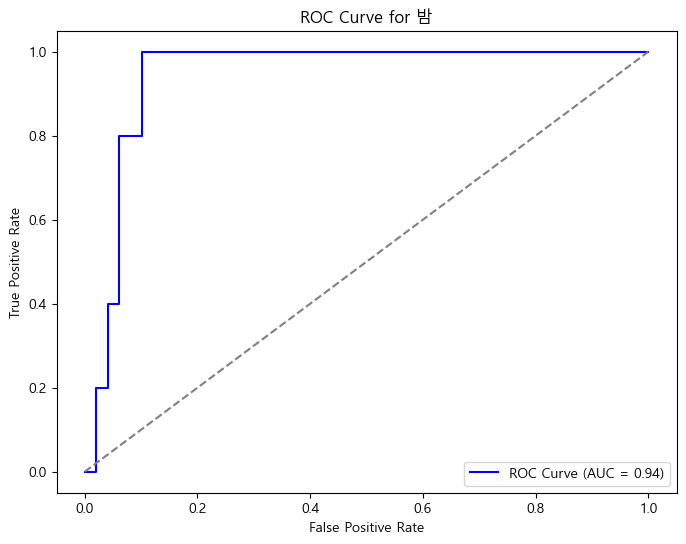

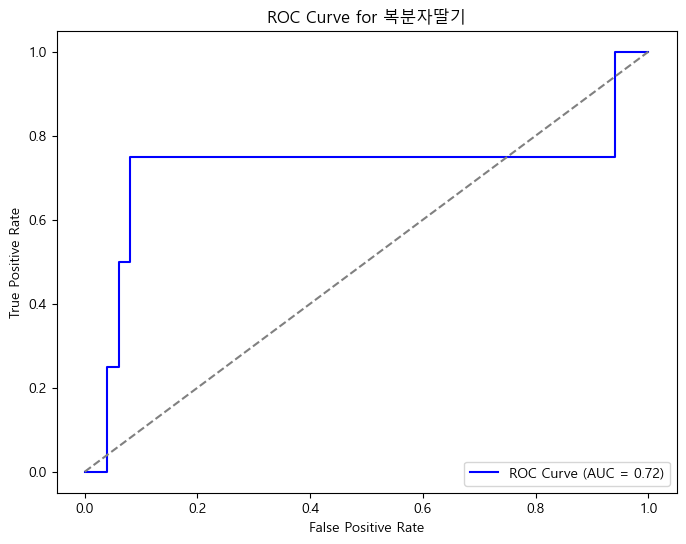

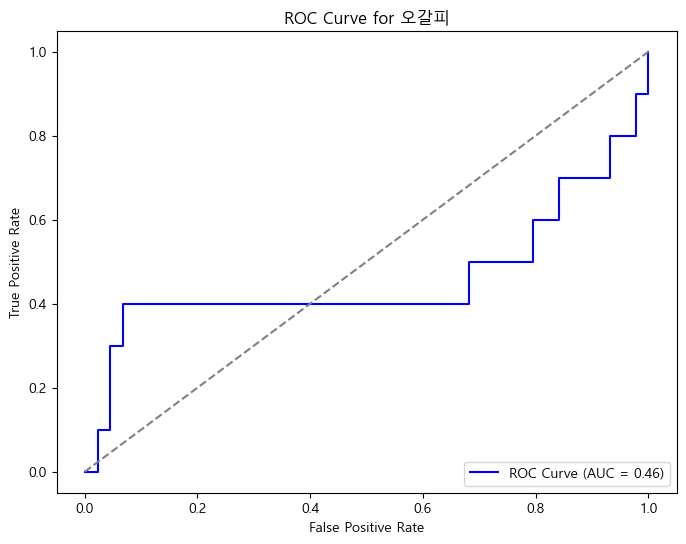

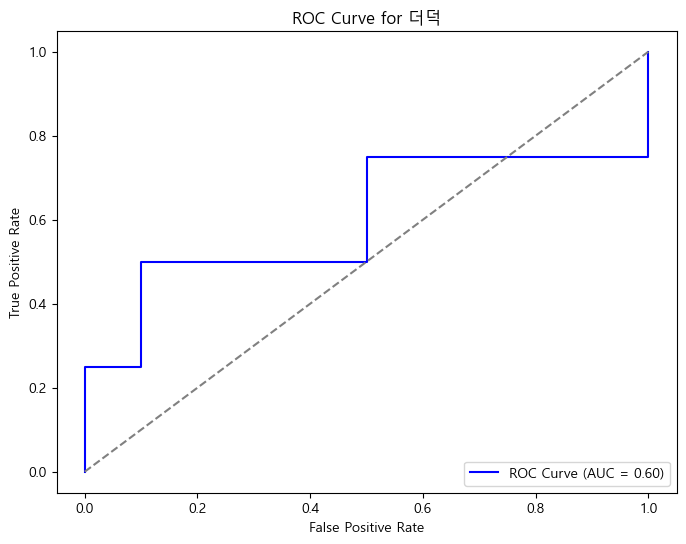

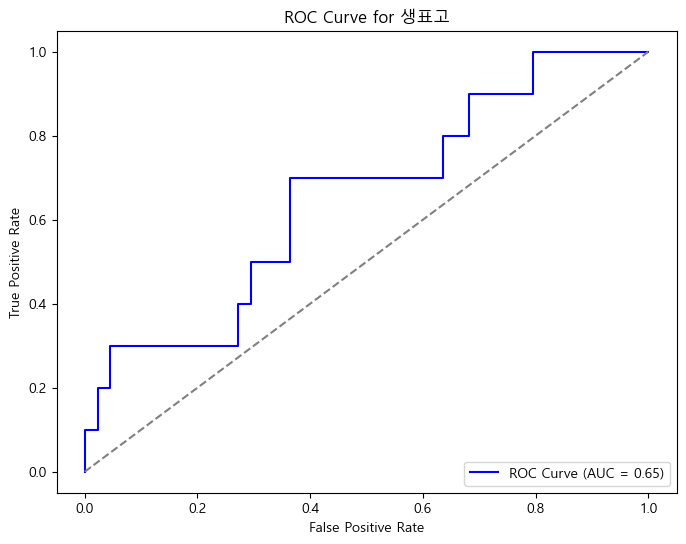

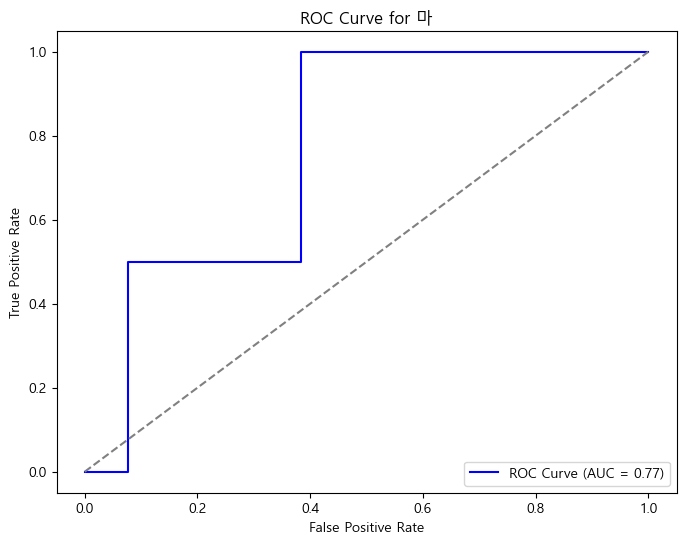

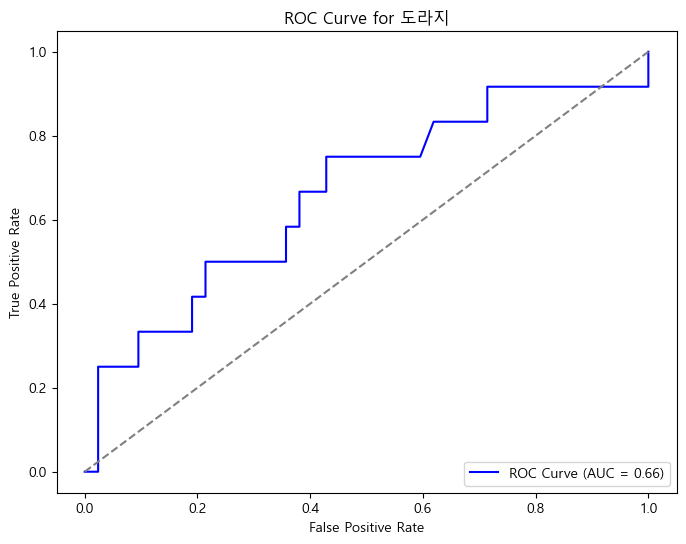

{'밤': 0.9428571428571428,
 '복분자딸기': 0.7200000000000001,
 '오갈피': 0.45909090909090905,
 '더덕': 0.6,
 '생표고': 0.6522727272727273,
 '마': 0.7692307692307692,
 '도라지': 0.6617063492063492}

In [46]:
#로지스틱 auc

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 데이터 로드
file_path = 'C:/Users/user/Desktop/진짜임 이게 찐.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 컬럼명 정리
data.columns = data.columns.str.replace(r' \([^)]*\)', '', regex=True).str.strip()

# 온도차이 변수 추가
data['온도차이'] = data['최고기온'] - data['최저기온']
data['도라지'] = data['도라지'].astype(int)

data = pd.get_dummies(data, columns=['토성코드', '토양깊이유형','토양유효수분량'])

# 품목별 컬럼 지정
columns_by_product = {
    '밤': ['토성코드_1','토성코드_2','토성코드_3','토성코드_4','연평균기온', '최고기온', '강수량(mm)'],
    '복분자딸기': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '최고기온', '상대습도(%)', '강수량(mm)'],
    '오갈피': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '더덕': ['토양깊이유형_10','토양깊이유형_18','토양깊이유형_20','토양깊이유형_30','토성코드_1','토성코드_2','토성코드_3','토성코드_4','토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '생표고': ['토양유효수분량_2','토양유효수분량_3','토양유효수분량_4', '연평균기온', '최고기온', '최저기온', '강수량(mm)'],
    '마': ['연평균기온', '최고기온', '최저기온'],
    '도라지':['강수량(mm)','온도차이','최고기온']
}

# 이진화 함수 (평균값 기준)
def convert_to_binary_by_mean(y):
    mean_value = np.mean(y)
    return np.where(y >= mean_value, 1, 0)

# 이진화 및 AUC 계산 함수
def process_and_evaluate(data, product, features):
    # 이진 타겟 변수 생성 (수확량이 평균값 이상이면 1, 아니면 0)
    target = convert_to_binary_by_mean(data[product])
    
    # 특성 선택
    X = data[features]
    
    # 특성 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 학습 데이터와 테스트 데이터로 분리
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.3, random_state=42)
    
    # 로지스틱 회귀 모델 학습
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # 예측 확률 값 계산
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # AUC 계산
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # ROC 곡선 그리기
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.rcParams['font.family'] ='Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] =False
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {product}')
    plt.legend(loc='lower right')
    plt.show()
    
    return auc

# 품목별 AUC 계산
auc_scores = {}

for product, features in columns_by_product.items():
    auc = process_and_evaluate(data, product, features)
    auc_scores[product] = auc

# AUC 출력
auc_scores

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 데이터 로드
file_path = 'C:/Users/user/Desktop/진짜임 이게 찐.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 컬럼명 정리
data.columns = data.columns.str.replace(r' \([^)]*\)', '', regex=True).str.strip()

data = pd.get_dummies(data, columns=['토성코드', '토양깊이유형','토양유효수분량'])

# 온도차이 변수 추가
data['온도차이'] = data['최고기온'] - data['최저기온']
data['도라지'] = data['도라지'].astype(int)

# 품목별 컬럼 지정
columns_by_product = {
    '밤': ['토성코드_1','토성코드_2','토성코드_3','토성코드_4','연평균기온', '최고기온', '강수량(mm)'],
    '복분자딸기': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '최고기온', '상대습도(%)', '강수량(mm)'],
    '오갈피': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '더덕': ['토양깊이유형_10','토양깊이유형_18','토양깊이유형_20','토양깊이유형_30','토성코드_1','토성코드_2','토성코드_3','토성코드_4','토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '생표고': ['토양유효수분량_2','토양유효수분량_3','토양유효수분량_4', '연평균기온', '최고기온', '최저기온', '강수량(mm)'],
    '마': ['연평균기온', '최고기온', '최저기온'],
    '도라지':['강수량(mm)','온도차이','최고기온']
}

# 이진화 함수 (평균값 기준)
def convert_to_binary_by_mean(y):
    mean_value = np.mean(y)
    return np.where(y >= mean_value, 1, 0)

# 이진화 및 변수 중요도 도출 함수
def process_and_evaluate(data, product, features):
    # 이진 타겟 변수 생성 (수확량이 평균값 이상이면 1, 아니면 0)
    target = convert_to_binary_by_mean(data[product])
    
    # 특성 선택
    X = data[features]
    
    # 특성 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 학습 데이터와 테스트 데이터로 분리
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.3, random_state=42)
    
    # 랜덤 포레스트 분류 모델 학습
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # 변수 중요도 (랜덤 포레스트 모델의 feature_importances_ 속성)
    feature_importance = model.feature_importances_
    
    return feature_importance

# 품목별 변수 중요도 저장할 딕셔너리
feature_importances = {}

# 각 품목별로 처리하고 변수 중요도 계산
for product, features in columns_by_product.items():
    importance = process_and_evaluate(data, product, features)
    feature_importances[product] = importance

# 변수 중요도 출력
for product, importance in feature_importances.items():
    print(f"{product} 변수 중요도:")
    for feature, imp in zip(columns_by_product[product], importance):
        print(f"  {feature}: {imp}")


밤 변수 중요도:
  토성코드_1: 0.03255063765697429
  토성코드_2: 0.05493609287700822
  토성코드_3: 0.017343861162734286
  토성코드_4: 0.0062363614139309695
  연평균기온: 0.24782207775329607
  최고기온: 0.23855452378444506
  강수량(mm): 0.402556445351611
복분자딸기 변수 중요도:
  토양유효수분량_1: 0.029126679506330674
  토양유효수분량_2: 0.02001582456256473
  토양유효수분량_3: 0.049649173854513215
  토양유효수분량_4: 0.03768246047825507
  토양유효수분량_5: 0.009739324722952969
  최고기온: 0.2639553588710774
  상대습도(%): 0.27022268981419245
  강수량(mm): 0.31960848819011345
오갈피 변수 중요도:
  토양유효수분량_1: 0.0001568509412665263
  토양유효수분량_2: 0.0071238431856904295
  토양유효수분량_3: 0.013499994895227106
  토양유효수분량_4: 0.014767288170851546
  토양유효수분량_5: 0.0010575362557897236
  연평균기온: 0.19323426634428414
  최고기온: 0.1263052994096206
  최저기온: 0.2274131711876021
  상대습도(%): 0.11579185193989916
  강수량(mm): 0.15527129636611223
  온도차이: 0.1453786013036564
더덕 변수 중요도:
  토양깊이유형_10: 0.0002022138341053123
  토양깊이유형_18: 0.00023666483061908898
  토양깊이유형_20: 0.0011326042503461537
  토양깊이유형_30: 0.0023095435514827963
 

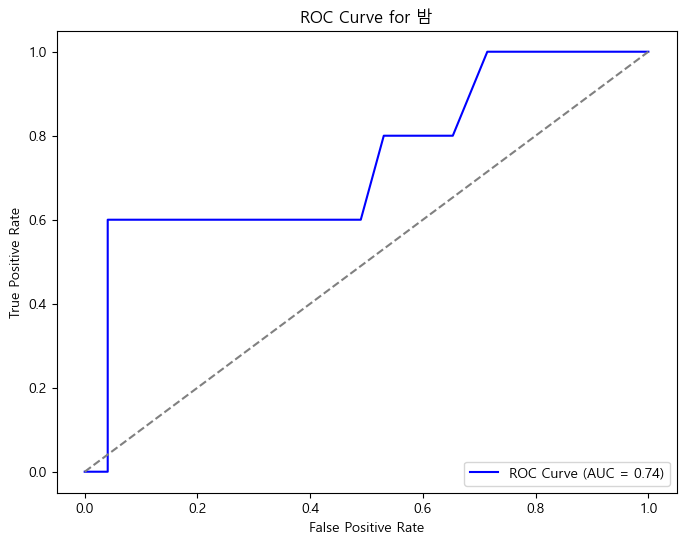

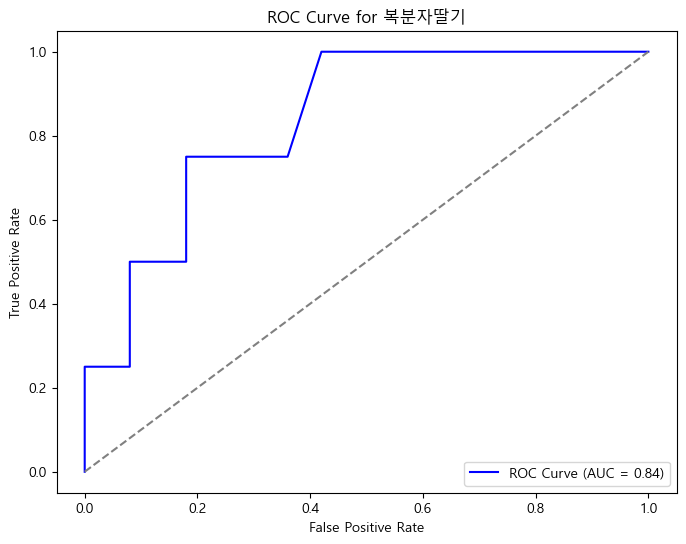

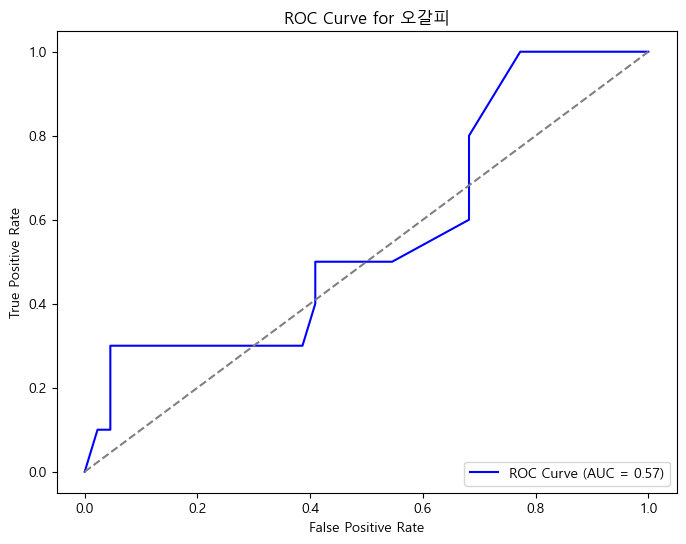

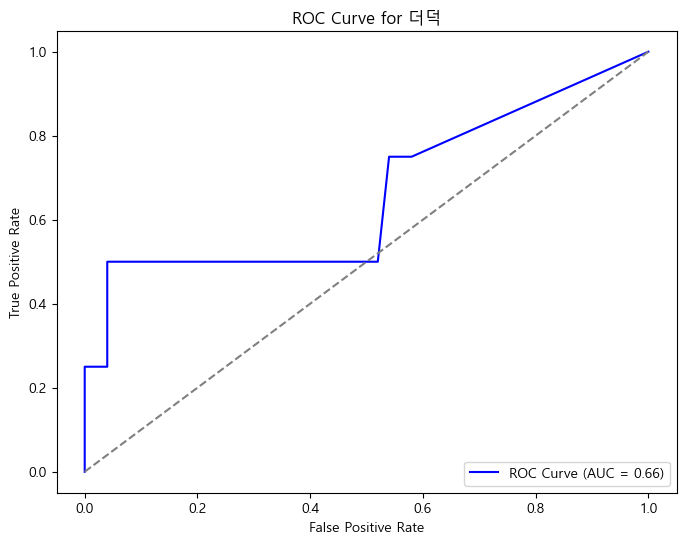

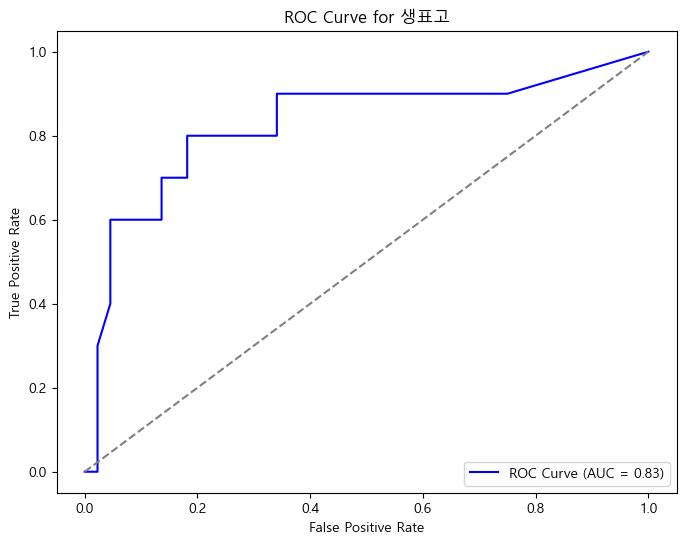

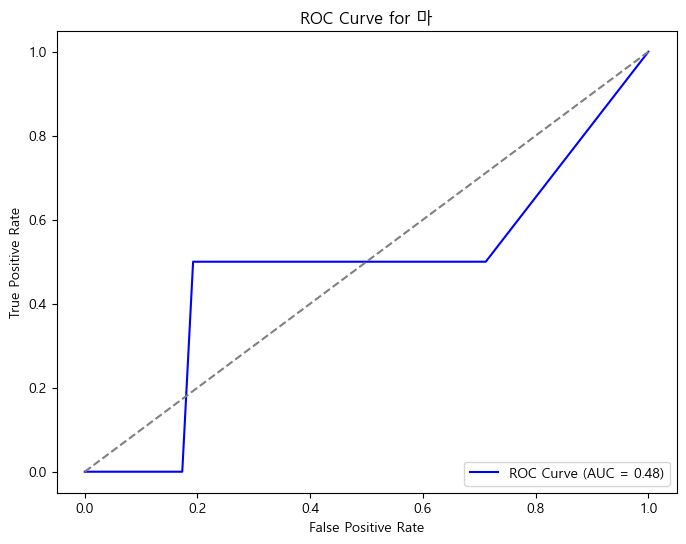

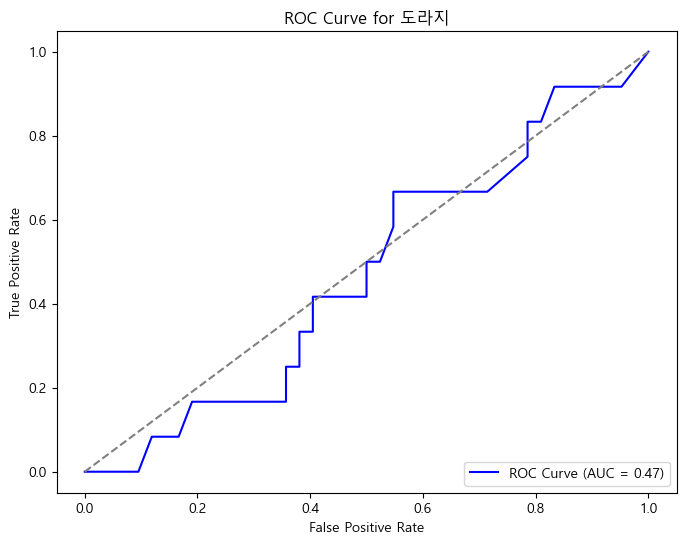

{'밤': 0.736734693877551,
 '복분자딸기': 0.8375,
 '오갈피': 0.5659090909090909,
 '더덕': 0.66,
 '생표고': 0.8272727272727274,
 '마': 0.4807692307692307,
 '도라지': 0.4712301587301588}

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 데이터 로드
file_path = 'C:/Users/user/Desktop/진짜임 이게 찐.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 컬럼명 정리
data.columns = data.columns.str.replace(r' \([^)]*\)', '', regex=True).str.strip()

# 온도차이 변수 추가
data['온도차이'] = data['최고기온'] - data['최저기온']
data['도라지'] = data['도라지'].astype(int)

data = pd.get_dummies(data, columns=['토성코드', '토양깊이유형','토양유효수분량'])

# 품목별 컬럼 지정
columns_by_product = {
    '밤': ['토성코드_1','토성코드_2','토성코드_3','토성코드_4','연평균기온', '최고기온', '강수량(mm)'],
    '복분자딸기': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '최고기온', '상대습도(%)', '강수량(mm)'],
    '오갈피': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '더덕': ['토양깊이유형_10','토양깊이유형_18','토양깊이유형_20','토양깊이유형_30','토성코드_1','토성코드_2','토성코드_3','토성코드_4','토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '생표고': ['토양유효수분량_2','토양유효수분량_3','토양유효수분량_4', '연평균기온', '최고기온', '최저기온', '강수량(mm)'],
    '마': ['연평균기온', '최고기온', '최저기온'],
    '도라지':['강수량(mm)','온도차이','최고기온']
}

# 이진화 함수 (평균값 기준)
def convert_to_binary_by_mean(y):
    mean_value = np.mean(y)
    return np.where(y >= mean_value, 1, 0)

# 이진화 및 AUC 계산 함수
def process_and_evaluate(data, product, features):
    # 이진 타겟 변수 생성 (수확량이 평균값 이상이면 1, 아니면 0)
    target = convert_to_binary_by_mean(data[product])
    
    # 특성 선택
    X = data[features]
    
    # 특성 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 학습 데이터와 테스트 데이터로 분리
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.3, random_state=42)
    
    # 랜덤 포레스트 모델 학습
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # 예측 확률 값 계산
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # AUC 계산
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # ROC 곡선 그리기
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.rcParams['font.family'] ='Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] =False
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {product}')
    plt.legend(loc='lower right')
    plt.show()
    
    return auc

# 품목별 AUC 계산
auc_scores = {}

for product, features in columns_by_product.items():
    auc = process_and_evaluate(data, product, features)
    auc_scores[product] = auc

# AUC 출력
auc_scores


In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

file_path = "C:/Users/user/Desktop/진짜임 이게 찐.csv"
data = pd.read_csv(file_path, encoding='euc-kr')

data['온도차이']=data['최고기온']-data['최저기온']
data = pd.get_dummies(data, columns=['토성코드', '토양깊이유형','토양유효수분량'])
# 품목별로 필요한 변수들 선택
feature_sets = {
    '밤': ['토성코드_1','토성코드_2','토성코드_3','토성코드_4','연평균기온', '최고기온', '강수량(mm)'],
    '복분자딸기': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '최고기온', '상대습도(%)', '강수량(mm)'],
    '오갈피': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '더덕': ['토양깊이유형_10','토양깊이유형_18','토양깊이유형_20','토양깊이유형_30','토성코드_1','토성코드_2','토성코드_3','토성코드_4','토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '생표고': ['토양유효수분량_2','토양유효수분량_3','토양유효수분량_4', '연평균기온', '최고기온', '최저기온', '강수량(mm)'],
    '마': ['연평균기온', '최고기온', '최저기온'],
    '도라지':['강수량(mm)','온도차이','최고기온']
}

# 결측치 제거
data_cleaned = data.dropna()

# 평균값 기준으로 이진 분류
def convert_to_binary_by_mean(y):
    mean_value = np.mean(y)
    return np.where(y >= mean_value, 1, 0)

# SVM 분류 모델 학습
def get_important_features_for_classification(data, target_col, features):
    X = data[features]
    y = data[target_col]
    
    # 타겟을 평균값 기준으로 이진 값으로 변환
    y_binary = convert_to_binary_by_mean(y)
    
    # 클래스가 하나만 있을 경우 예외 처리
    if len(np.unique(y_binary)) == 1:
        print(f"경고: {target_col}에서 클래스가 하나만 존재합니다. 분류를 수행할 수 없습니다.")
        return None, None

    # 범주형 변수는 Label Encoding
    le = LabelEncoder()
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = le.fit_transform(X[col])
    
    # 훈련 데이터와 테스트 데이터로 나누기
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
    
    # SVM 분류 모델 학습 (SVC로 이진 분류)
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    
    # 변수 중요도
    feature_importance = model.coef_
    
    return feature_importance, features

# 품목별로 주요 변수 추출
for item, features in feature_sets.items():
    target_col = item + ' (kg)'  # 품목별 생산량 컬럼
    feature_importance, features = get_important_features_for_classification(data_cleaned, target_col, features)
    
    if feature_importance is not None:
        print(f"{item} - 주요 변수 중요도:")
        for feature, importance in zip(features, feature_importance[0]):
            print(f"{feature}: {importance}")
        print()

밤 - 주요 변수 중요도:
토성코드_1: 0.5763146268864068
토성코드_2: 0.2873379003105292
토성코드_3: -0.4152795908181084
토성코드_4: -0.4483729363788458
연평균기온: -0.20878056847918636
최고기온: 0.38757820931001774
강수량(mm): 0.0022087768804794905

복분자딸기 - 주요 변수 중요도:
토양유효수분량_1: 0.0
토양유효수분량_2: 0.05578239439902832
토양유효수분량_3: -0.011107396351961007
토양유효수분량_4: -0.04467499804711972
토양유효수분량_5: 0.0
최고기온: 0.09824030132670103
상대습도(%): 0.0032675237866328644
강수량(mm): -1.6094401871669106e-05

오갈피 - 주요 변수 중요도:
토양유효수분량_1: 0.0
토양유효수분량_2: 0.09443228072157606
토양유효수분량_3: 0.18085921049787146
토양유효수분량_4: 0.29432046963013825
토양유효수분량_5: -0.5696119608496311
연평균기온: -0.31821451218083396
최고기온: 0.01161425416747619
최저기온: 0.001250979315607026
상대습도(%): -0.05465284916232349
강수량(mm): 0.0007852369278680271
온도차이: 0.010363274851822979

더덕 - 주요 변수 중요도:
토양깊이유형_10: 0.0
토양깊이유형_18: 0.0
토양깊이유형_20: 0.011796641282663778
토양깊이유형_30: -0.011796641282606329
토성코드_1: -0.09128948088014699
토성코드_2: 0.1392142959776399
토성코드_3: -0.008135695096416207
토성코드_4: -0.039789120001019695


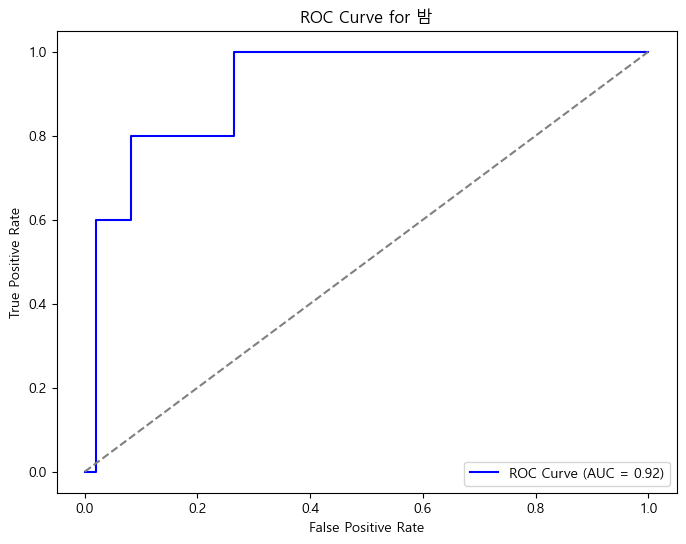

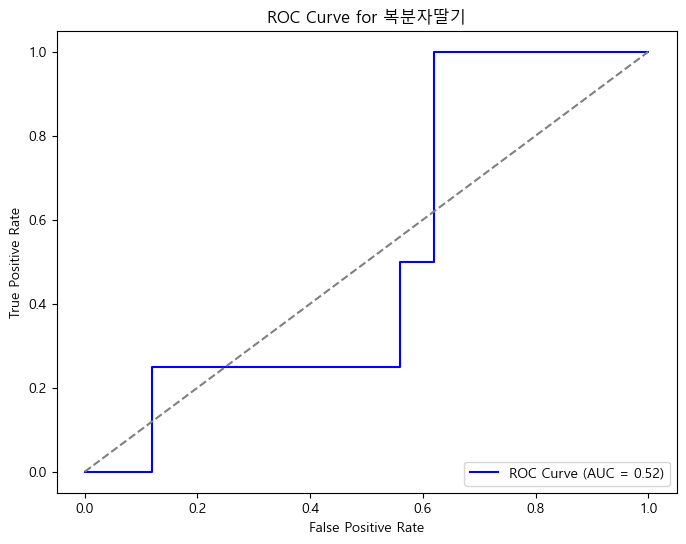

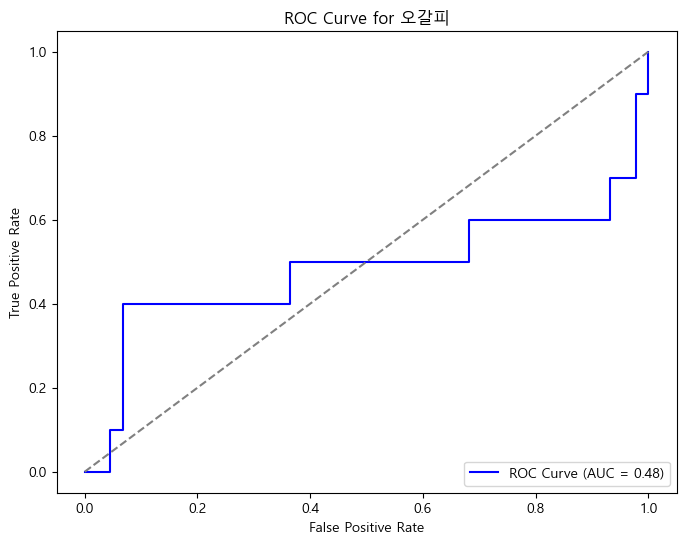

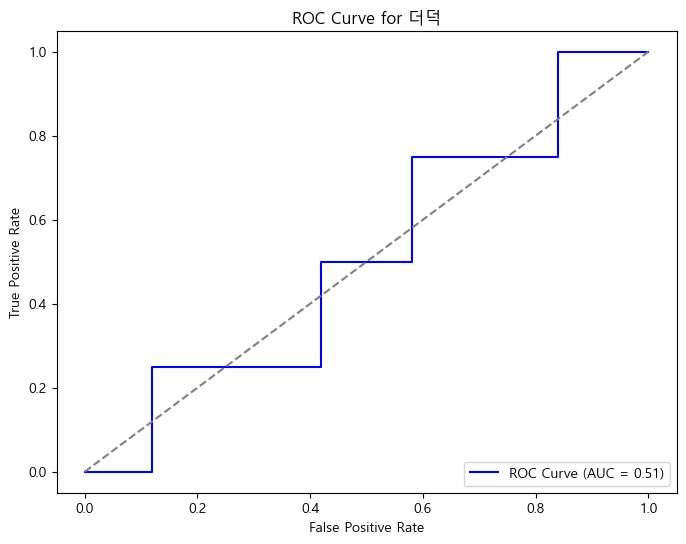

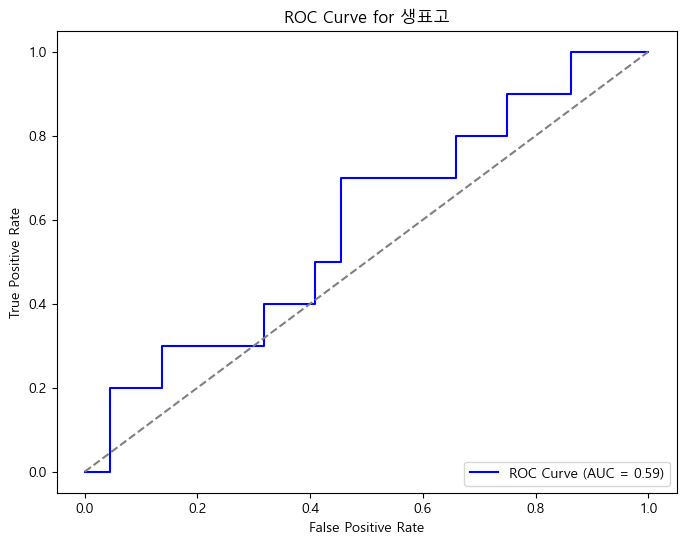

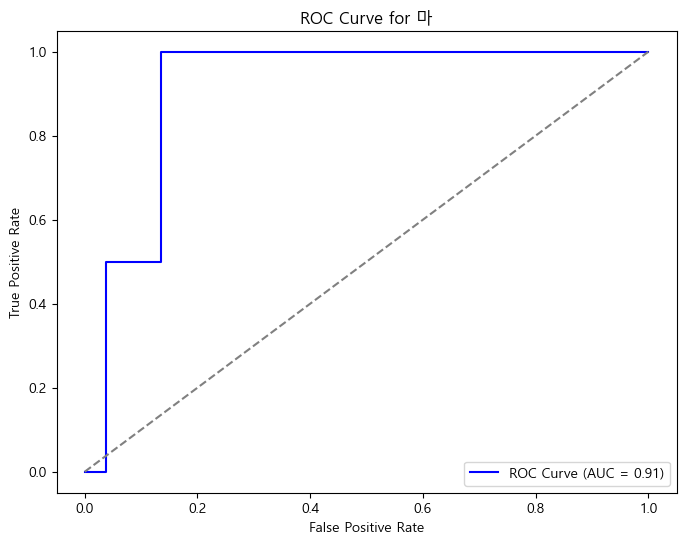

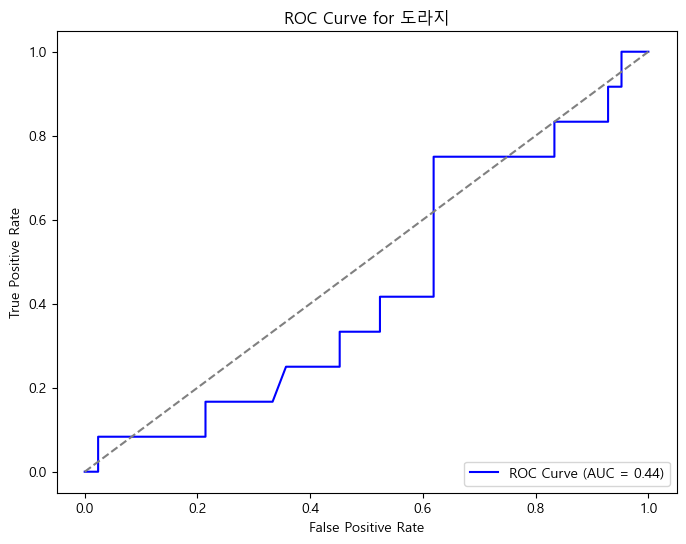

{'밤': 0.9183673469387754,
 '복분자딸기': 0.52,
 '오갈피': 0.4818181818181818,
 '더덕': 0.51,
 '생표고': 0.5863636363636364,
 '마': 0.9134615384615384,
 '도라지': 0.4375}

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 데이터 로드
file_path = 'C:/Users/user/Desktop/진짜임 이게 찐.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 컬럼명 정리
data.columns = data.columns.str.replace(r' \([^)]*\)', '', regex=True).str.strip()

# 온도차이 변수 추가
data['온도차이'] = data['최고기온'] - data['최저기온']
data['도라지'] = data['도라지'].astype(int)

# 품목별 컬럼 지정
data = pd.get_dummies(data, columns=['토성코드', '토양깊이유형','토양유효수분량'])
# 품목별로 필요한 변수들 선택
feature_sets = {
    '밤': ['토성코드_1','토성코드_2','토성코드_3','토성코드_4','연평균기온', '최고기온', '강수량(mm)'],
    '복분자딸기': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '최고기온', '상대습도(%)', '강수량(mm)'],
    '오갈피': ['토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '더덕': ['토양깊이유형_10','토양깊이유형_18','토양깊이유형_20','토양깊이유형_30','토성코드_1','토성코드_2','토성코드_3','토성코드_4','토양유효수분량_1','토양유효수분량_2','토양유효수분량_3','토양유효수분량_4','토양유효수분량_5', '연평균기온', '최고기온', '최저기온', '상대습도(%)', '강수량(mm)', '온도차이'],
    '생표고': ['토양유효수분량_2','토양유효수분량_3','토양유효수분량_4', '연평균기온', '최고기온', '최저기온', '강수량(mm)'],
    '마': ['연평균기온', '최고기온', '최저기온'],
    '도라지':['강수량(mm)','온도차이','최고기온']
}

# 이진화 함수 (평균값 기준)
def convert_to_binary_by_mean(y):
    mean_value = np.mean(y)
    return np.where(y >= mean_value, 1, 0)

# 이진화 및 AUC 계산 함수
def process_and_evaluate(data, product, features):
    # 이진 타겟 변수 생성 (수확량이 평균값 이상이면 1, 아니면 0)
    target = convert_to_binary_by_mean(data[product])
    
    # 특성 선택
    X = data[features]
    
    # 특성 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 학습 데이터와 테스트 데이터로 분리
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.3, random_state=42)
    
    # SVM 모델 학습 (probability=True로 설정하여 predict_proba 사용 가능)
    model = SVC(kernel='linear', probability=True, random_state=42)
    model.fit(X_train, y_train)
    
    # 예측 확률 값 계산
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # AUC 계산
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # ROC 곡선 그리기
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {product}')
    plt.legend(loc='lower right')
    plt.show()
    
    return auc

# 품목별 AUC 계산
auc_scores = {}

for product, features in columns_by_product.items():
    auc = process_and_evaluate(data, product, features)
    auc_scores[product] = auc

# AUC 출력
auc_scores


In [9]:
import pandas as pd
file_path = r"C:/Users/user/Desktop/기후데이터_온도차이_범주화_완.csv"
climate_data = pd.read_csv(file_path, encoding='cp949')
filtered_data = climate_data[
    (climate_data['토성코드'] == 1) & 
    (climate_data['최고기온_숫자'] == 3) & 
    (climate_data['강수량(mm)_숫자'] == 3 )
]
print('밤:',filtered_data['지역'])


import pandas as pd
file_path = r"C:/Users/user/Desktop/기후데이터_온도차이_범주화_완.csv"
climate_data = pd.read_csv(file_path, encoding='cp949')
filtered_data = climate_data[
    (climate_data['강수량(mm)_숫자'] == 2) & 
    (climate_data['토양유효수분량'] == 3) & 
    (climate_data['상대습도(%)_숫자'] == 3)
]
print('복분자딸기:',filtered_data['지역'])

import pandas as pd
file_path = r"C:/Users/user/Desktop/기후데이터_온도차이_범주화_완.csv"
climate_data = pd.read_csv(file_path, encoding='cp949')
filtered_data = climate_data[
    (climate_data['연평균기온_숫자'] == 2) & 
    (climate_data['토양유효수분량'] == 4) & 
    (climate_data['최저기온_숫자'] == 2)
]
print('오갈피:',filtered_data['지역'])

import pandas as pd
file_path = r"C:/Users/user/Desktop/기후데이터_온도차이_범주화_완.csv"
filtered_data = climate_data[
    (climate_data['강수량(mm)_숫자'] == 3) & 
    (climate_data['토양유효수분량'] == 2) & 
    (climate_data['최고기온_숫자'] == 3)
]
print('생표고:',filtered_data['지역'])

import pandas as pd
file_path = r"C:/Users/user/Desktop/기후데이터_온도차이_범주화_완.csv"
filtered_data = climate_data[
    (climate_data['연평균기온_숫자'] == 4) & 
    (climate_data['토양유효수분량'] == 5) & 
    (climate_data['온도차이_숫자'] == 4)
]
print('더덕:',filtered_data['지역'])

import pandas as pd
file_path = r"C:/Users/user/Desktop/기후데이터_온도차이_범주화_완.csv"
filtered_data = climate_data[ 
    (climate_data['강수량(mm)_숫자'] == 2) & 
    (climate_data['온도차이_숫자'] == 4)&
    (climate_data['최고기온_숫자'] == 1)
]
print('도라지:',filtered_data['지역'])

import pandas as pd
file_path = r"C:/Users/user/Desktop/기후데이터_온도차이_범주화_완.csv"

filtered_data = climate_data[ 
    (climate_data['최저기온_숫자'] == 2) & 
    (climate_data['최고기온_숫자'] == 2)&
    (climate_data['연평균기온_숫자'] == 2)
]
print('마:',filtered_data['지역'])


밤: 44      경상남도 거창군
91     대전광역시 대덕구
94     대전광역시 유성구
138     전라북도 남원시
157     충청남도 부여군
Name: 지역, dtype: object
복분자딸기: 105     인천광역시 강화군
108    인천광역시 미추홀구
110      인천광역시 서구
111     인천광역시 옹진군
112      인천광역시 중구
153      충청남도 금산군
Name: 지역, dtype: object
오갈피: 8        강원도 원주
20      경기도 과천시
41      경기도 하남시
63     경상북도 고령군
65      경상북도 군위
66     경상북도 김천시
67     경상북도 문경시
69     경상북도 상주시
71     경상북도 안동시
77     경상북도 울릉군
78      경상북도 울진
122     전라남도보성군
154    충청남도 논산시
155    충청남도 당진시
157    충청남도 부여군
158    충청남도 서산시
161    충청남도 예산군
162    충청남도 천안시
165    충청남도 홍성군
Name: 지역, dtype: object
생표고: 91     대전광역시 대덕구
94     대전광역시 유성구
138     전라북도 남원시
146    전라북도 전주시 
147     전라북도 정읍시
Name: 지역, dtype: object
더덕: 84     광주광역시 광산구
101     울산광역시 남구
Name: 지역, dtype: object
도라지: 2          강원도 동해
3          강원도 삼척
7          강원도 영월
9          강원도 인제
16         강원도 화천
36        경기도 용인시
99      서울특별시 종로구
105     인천광역시 강화군
106     인천광역시 계양구
107     인천광역시 남동구
108    인천광역시 미추홀구
110      인천광역시 서구
111     인천광역시 옹진군
1